In [266]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn import neural_network
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.model_selection import KFold

import statistics

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'


In [26]:
import seaborn as sb

In [135]:
# TASK 0

df = df = pd.read_csv('blood_transfusion.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_since_last_donation   748 non-null    float64
 1   total_number_of_donations    748 non-null    float64
 2   total_blood_donated          748 non-null    float64
 3   months_since_first_donation  748 non-null    float64
 4   class                        748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


In [136]:
df.isnull().sum()

months_since_last_donation     0
total_number_of_donations      0
total_blood_donated            0
months_since_first_donation    0
class                          0
dtype: int64

In [137]:
df.describe()

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [ ]:
#TASK 1

In [217]:
df[df['total_blood_donated'] == 250.0]['months_since_first_donation'].value_counts(normalize=True)

months_since_first_donation
4.0     0.221519
2.0     0.208861
16.0    0.107595
14.0    0.101266
21.0    0.101266
23.0    0.101266
11.0    0.088608
9.0     0.018987
38.0    0.012658
22.0    0.006329
40.0    0.006329
74.0    0.006329
3.0     0.006329
39.0    0.006329
72.0    0.006329
Name: proportion, dtype: float64

In [233]:
df[df['months_since_first_donation'] >= 84]['total_number_of_donations'].value_counts(normalize=True)

total_number_of_donations
12.0    0.138889
14.0    0.111111
11.0    0.083333
16.0    0.083333
7.0     0.083333
3.0     0.055556
50.0    0.027778
9.0     0.027778
33.0    0.027778
41.0    0.027778
44.0    0.027778
43.0    0.027778
2.0     0.027778
8.0     0.027778
4.0     0.027778
6.0     0.027778
46.0    0.027778
10.0    0.027778
38.0    0.027778
22.0    0.027778
17.0    0.027778
15.0    0.027778
Name: proportion, dtype: float64

In [208]:
df['months_since_first_donation'].value_counts()

months_since_first_donation
4.0     57
16.0    51
14.0    44
23.0    36
2.0     36
        ..
12.0     1
55.0     1
3.0      1
13.0     1
54.0     1
Name: count, Length: 78, dtype: int64

In [214]:
df['months_since_last_donation'].value_counts()

months_since_last_donation
2.0     173
4.0     156
11.0     84
14.0     76
16.0     63
23.0     50
21.0     44
9.0      20
3.0      13
1.0       9
7.0       8
5.0       6
8.0       6
12.0      6
6.0       5
13.0      5
0.0       5
10.0      3
38.0      2
18.0      2
15.0      2
22.0      1
26.0      1
35.0      1
40.0      1
74.0      1
20.0      1
17.0      1
25.0      1
39.0      1
72.0      1
Name: count, dtype: int64

In [213]:
df['total_number_of_donations'].value_counts()

total_number_of_donations
1.0     158
2.0     112
3.0      87
4.0      62
5.0      62
6.0      52
7.0      43
8.0      31
9.0      24
11.0     22
12.0     14
10.0     14
14.0     13
16.0     13
13.0      9
15.0      6
17.0      4
24.0      3
21.0      2
19.0      2
20.0      2
22.0      2
34.0      1
41.0      1
26.0      1
44.0      1
50.0      1
43.0      1
38.0      1
18.0      1
23.0      1
46.0      1
33.0      1
Name: count, dtype: int64

In [215]:
df['total_blood_donated'].value_counts()            

total_blood_donated
250.0      158
500.0      112
750.0       87
1000.0      62
1250.0      62
1500.0      52
1750.0      43
2000.0      31
2250.0      24
2750.0      22
3000.0      14
2500.0      14
3500.0      13
4000.0      13
3250.0       9
3750.0       6
4250.0       4
6000.0       3
5250.0       2
4750.0       2
5000.0       2
5500.0       2
8500.0       1
10250.0      1
6500.0       1
11000.0      1
12500.0      1
10750.0      1
9500.0       1
4500.0       1
5750.0       1
11500.0      1
8250.0       1
Name: count, dtype: int64

In [222]:
df[df['total_blood_donated'] == 12500].value_counts()

months_since_last_donation  total_number_of_donations  total_blood_donated  months_since_first_donation  class
2.0                         50.0                       12500.0              98.0                         1        1
Name: count, dtype: int64

In [138]:
fig = pd.fig = px.histogram(data_frame=df, x='class', color='months_since_last_donation')
fig.show()


In [218]:
fig = pd.fig = px.scatter(data_frame=df, x='months_since_first_donation', y='total_blood_donated', color='class')
fig.show()

In [239]:
fig = px.scatter_matrix(df,dimensions=['months_since_last_donation', 'total_number_of_donations', 'total_blood_donated','months_since_first_donation'], color= 'class')
fig.show() 

In [202]:
print(df.corr()) 

                             months_since_last_donation  \
months_since_last_donation                     1.000000   
total_number_of_donations                     -0.182745   
total_blood_donated                           -0.182745   
months_since_first_donation                    0.160618   
class                                         -0.279869   

                             total_number_of_donations  total_blood_donated  \
months_since_last_donation                   -0.182745            -0.182745   
total_number_of_donations                     1.000000             1.000000   
total_blood_donated                           1.000000             1.000000   
months_since_first_donation                   0.634940             0.634940   
class                                         0.218633             0.218633   

                             months_since_first_donation     class  
months_since_last_donation                      0.160618 -0.279869  
total_number_of_donations       

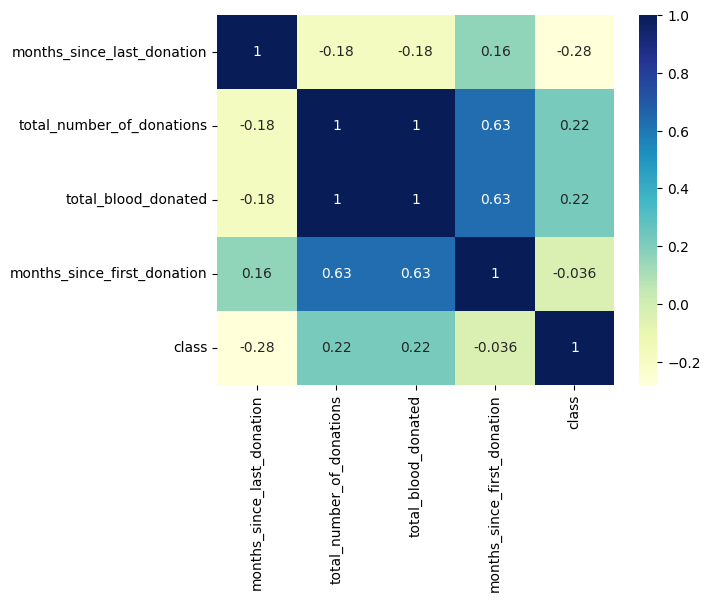

In [203]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 


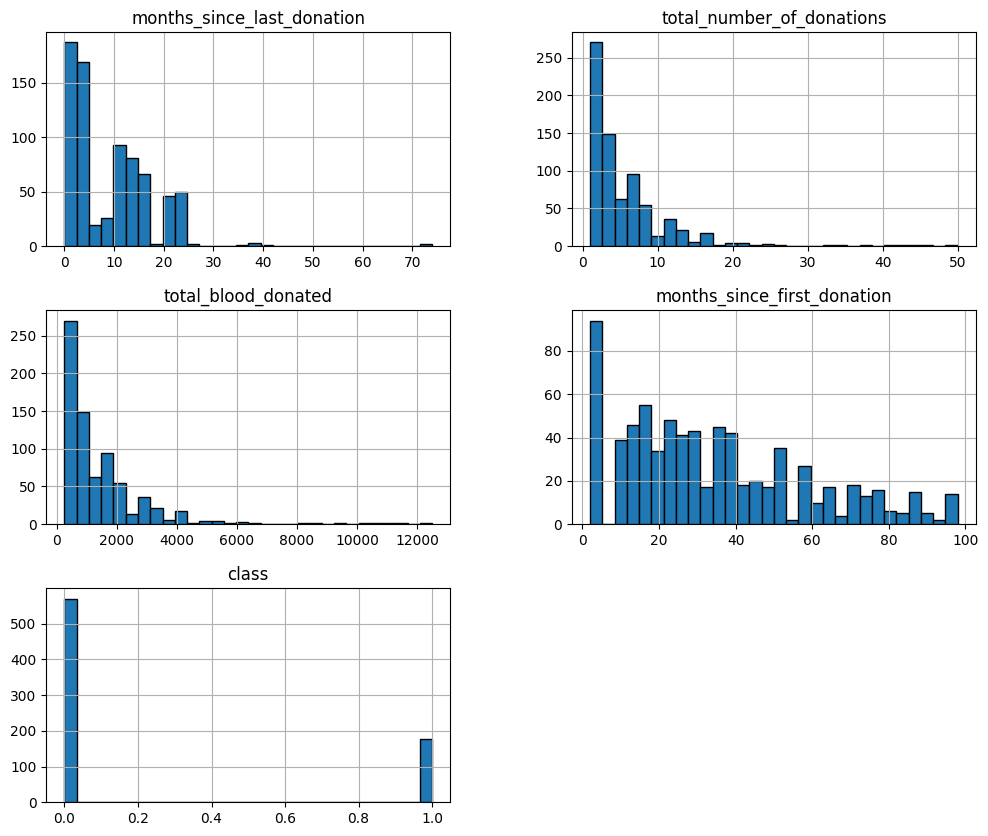

In [236]:
_ = df.hist(figsize=(12, 10), bins=30, edgecolor="black")


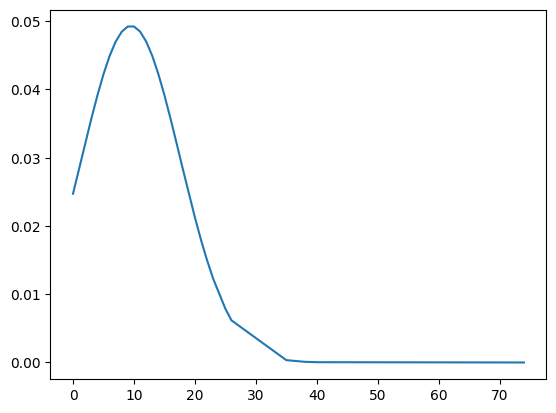

In [139]:
df_mean = np.mean(df["months_since_last_donation"])
df_std = np.std(df["months_since_last_donation"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["months_since_last_donation"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["months_since_last_donation"].sort_values(), pdf)
plt.show()

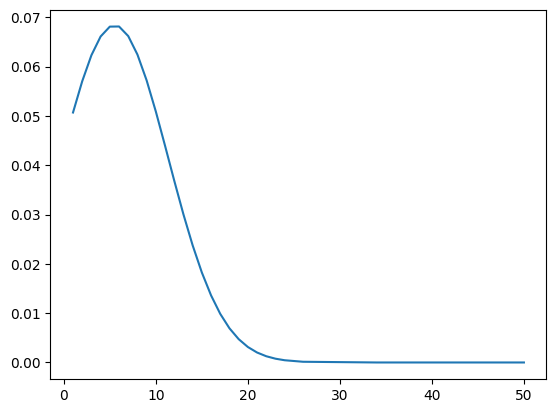

In [140]:
df_mean = np.mean(df["total_number_of_donations"])
df_std = np.std(df["total_number_of_donations"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["total_number_of_donations"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["total_number_of_donations"].sort_values(), pdf)
plt.show()

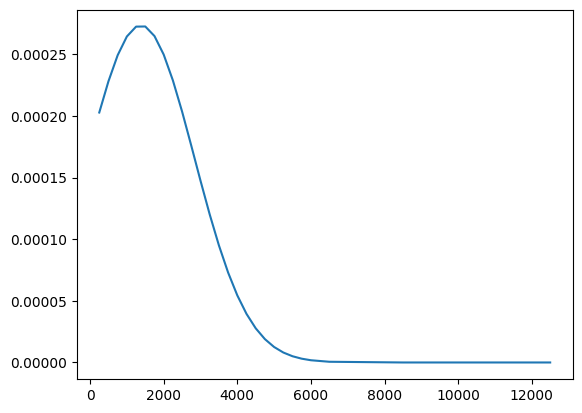

In [141]:
df_mean = np.mean(df["total_blood_donated"])
df_std = np.std(df["total_blood_donated"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["total_blood_donated"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["total_blood_donated"].sort_values(), pdf)
plt.show()

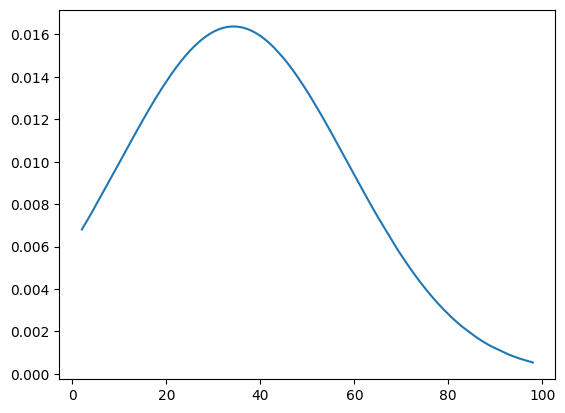

In [142]:
df_mean = np.mean(df["months_since_first_donation"])
df_std = np.std(df["months_since_first_donation"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["months_since_first_donation"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["months_since_first_donation"].sort_values(), pdf)
plt.show()

In [250]:
#Task 2 Normalization

In [251]:
def normalize(row, min, max):
    return (row - min ) / (max - min)

In [252]:
df

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
0,2.0,50.0,12500.0,98.0,1
1,0.0,13.0,3250.0,28.0,1
2,1.0,16.0,4000.0,35.0,1
3,2.0,20.0,5000.0,45.0,1
4,1.0,24.0,6000.0,77.0,0
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,0
744,21.0,2.0,500.0,52.0,0
745,23.0,3.0,750.0,62.0,0
746,39.0,1.0,250.0,39.0,0


In [253]:
normalized = df.copy()

In [254]:
normalized["months_since_first_donation"] = normalized["months_since_first_donation"].apply(normalize, args=(normalized["months_since_first_donation"].min(), normalized["months_since_first_donation"].max(), ))
normalized

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
0,2.0,50.0,12500.0,1.000000,1
1,0.0,13.0,3250.0,0.270833,1
2,1.0,16.0,4000.0,0.343750,1
3,2.0,20.0,5000.0,0.447917,1
4,1.0,24.0,6000.0,0.781250,0
...,...,...,...,...,...
743,23.0,2.0,500.0,0.375000,0
744,21.0,2.0,500.0,0.520833,0
745,23.0,3.0,750.0,0.625000,0
746,39.0,1.0,250.0,0.385417,0


In [255]:
#TASK 3 

train70, test30 = train_test_split(normalized, test_size=0.30, random_state=5, shuffle=True, stratify=None)
train70

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
228,4.0,1.0,250.0,0.020833,0
322,11.0,4.0,1000.0,0.333333,0
197,4.0,6.0,1500.0,0.468750,0
650,9.0,1.0,250.0,0.072917,0
68,4.0,7.0,1750.0,0.239583,0
...,...,...,...,...,...
73,2.0,2.0,500.0,0.020833,0
400,18.0,2.0,500.0,0.218750,0
118,1.0,7.0,1750.0,0.572917,0
701,16.0,1.0,250.0,0.145833,0


In [256]:
test30

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
709,21.0,6.0,1500.0,0.479167,0
704,16.0,1.0,250.0,0.145833,0
12,2.0,10.0,2500.0,0.270833,1
541,2.0,10.0,2500.0,0.520833,0
163,2.0,1.0,250.0,0.000000,1
...,...,...,...,...,...
630,8.0,9.0,2250.0,0.645833,0
596,3.0,1.0,250.0,0.010417,1
300,14.0,2.0,500.0,0.125000,0
326,2.0,2.0,500.0,0.406250,0


In [257]:
# TASK 3
train90, test10 = train_test_split(normalized, test_size=0.10, random_state=6, shuffle=True, stratify=None)
train90

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
325,14.0,2.0,500.0,0.145833,0
709,21.0,6.0,1500.0,0.479167,0
613,4.0,1.0,250.0,0.020833,0
158,2.0,1.0,250.0,0.000000,0
43,2.0,5.0,1250.0,0.145833,0
...,...,...,...,...,...
335,16.0,3.0,750.0,0.197917,1
365,14.0,2.0,500.0,0.197917,1
618,4.0,1.0,250.0,0.020833,1
227,4.0,3.0,750.0,0.229167,0


In [258]:
test10

,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
648,11.0,3.0,750.0,0.218750,0
375,11.0,3.0,750.0,0.395833,1
390,11.0,4.0,1000.0,0.583333,0
199,9.0,9.0,2250.0,0.447917,0
507,2.0,11.0,2750.0,0.218750,0
...,...,...,...,...,...
59,3.0,6.0,1500.0,0.197917,0
640,11.0,8.0,2000.0,0.520833,1
677,23.0,19.0,4750.0,0.625000,0
696,14.0,3.0,750.0,0.343750,0


In [267]:
# The cleaning prcoess for the 90 | 10 split. 

y_train90 = train90['class']
X_train90 = train90.drop(['class'], axis=1)

y_test10 = test10['class']
X_test10 = test10.drop(['class'], axis=1)


In [268]:
# The cleaning prcoess for the 70 | 30 split. 

y_train70 = train70['class']
X_train70 = train70.drop(['class'], axis=1)
# X_train70.head()

y_test30 = test30['class']
X_test30 = test30.drop(['class'], axis=1)
# X_test30.head()

In [269]:
# Task 4
# 4.1 KNN Classifier

In [270]:
def knndistance(newpoint, neighbor, wholeset):
    temp = pow(wholeset.loc[neighbor][0] - wholeset.loc[newpoint][0], 2) + pow(wholeset.loc[neighbor][1] - wholeset.loc[newpoint][1],2) + pow(wholeset.loc[neighbor][2] - wholeset.loc[newpoint][2],2) + pow(wholeset.loc[neighbor][3] - wholeset.loc[newpoint][3],2)
    distance = pow(temp, 0.5)
    return distance

In [271]:
def mostcommonlabel(labels):
    mostcommon = labels[0]
    mostcommoncount = labels.count(mostcommon)
    for i in labels:
        label_i = labels[i]
        count_i = labels.count(label_i)
        if count_i > mostcommoncount:
            mostcommon = label_i
            mostcommoncount = count_i
    return mostcommon

In [273]:
def KNN_singlepoint(o, k, trainset, testset, wholeset):
    knndataset = trainset.copy()
    distances = [] 
    for neighbor in knndataset.index:
        distance = knndistance(o, neighbor, wholeset)
        distances.append(distance)
    # add distances column to dataset
    knndataset['Distance'] = distances
    # sort dataset on distances from low to high
    newdf = knndataset.sort_values(by=['Distance'])
    # take the k datapoints with the lowest distances
    knearest = newdf.head(k)
    # from the k datapoints get the most common label
    #prediction = mostcommonlabel(knearest["class"].to_list())
    prediction = statistics.mode(knearest["class"].to_list())
    # return that label
    return prediction

In [274]:
def KNN(k, trainset, testset, wholeset):
    predictions = []
    for o in testset.index:
        pred = KNN_singlepoint(o, k, trainset, testset, wholeset)
        #pred = o
        #print(pred)
        predictions.append(pred)
    return predictions

In [275]:
wholedf = df.drop(['class'], axis=1)

In [277]:
predKNN90 = KNN(5, train90, test10, wholedf)
accuracy_score(y_test10, predKNN90)

0.6933333333333334

In [278]:
predKNN70 = KNN(5, train70, test30, wholedf)
accuracy_score(y_test30, predKNN70)

0.7644444444444445

In [279]:
# TASK 4
# 4.2
GausNB = GaussianNB()
GausNB.fit(X_train90, y_train90)
print(GausNB)

predGNB90 = GausNB.predict(X_test10)
accuracy_score(y_test10, predGNB90)

GaussianNB()


0.7333333333333333

In [280]:
# TASK 4
# 4.2
GausNB = GaussianNB()
GausNB.fit(X_train70, y_train70)
print(GausNB)

predGNB70 = GausNB.predict(X_test30)
accuracy_score(y_test30, predGNB70)

GaussianNB()


0.7688888888888888

In [281]:
# TASK 4
# 4.3
SVM_Model = SVC(gamma='auto')
SVM_Model.fit(X_train90,y_train90)

predSVM90 = SVM_Model.predict(X_test10)
accuracy_score(y_test10, predSVM90)

0.7466666666666667

In [282]:
# TASK 4
# 4.3
SVM_Model = SVC(gamma='auto')
SVM_Model.fit(X_train70,y_train70)

predSVM70 = SVM_Model.predict(X_test30)
accuracy_score(y_test30, predSVM70)

0.7688888888888888

In [283]:
# TASK 4
# 4.4
MLP = neural_network.MLPClassifier(max_iter=5000)
MLP.fit(X_train90, y_train90)

predMLP90 = MLP.predict(X_test10)
accuracy_score(y_test10, predMLP90)

0.76

In [284]:
# TASK 4
# 4.4
MLP = neural_network.MLPClassifier(max_iter=5000)
MLP.fit(X_train70, y_train70)

predMLP70 = MLP.predict(X_test30)
accuracy_score(y_test30, predMLP70)

0.7688888888888888

In [286]:
#Task 5
#5.1 Confusion Matrix
def confusion_matrix(actual, predicted):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            TP += 1
        elif actual[i] == 1 and predicted[i] == 0:
            FN += 1
        elif actual[i] == 0 and predicted[i] == 1:
            FP += 1
        elif actual[i] == 0 and predicted[i] == 0:
            TN += 1
    matrix = [["TP: " + str(TP), "FN: " + str(FN)],["FP: " + str(FP), "TN: " + str(TN)]]
    return matrix

In [287]:
#90/10 KNN Confusion Matrix
print(np.matrix(confusion_matrix(y_test10.to_list(), predKNN90)))

[['TP: 5' 'FN: 13']
 ['FP: 10' 'TN: 47']]


In [288]:
#70/30 KNN Confusion Matrix
print(np.matrix(confusion_matrix(y_test30.to_list(), predKNN70)))

[['TP: 15' 'FN: 37']
 ['FP: 16' 'TN: 157']]


In [289]:
#90/10 GaussianNB Confusion Matrix
print(np.matrix(confusion_matrix(y_test10.to_list(), predGNB90)))

[['TP: 7' 'FN: 11']
 ['FP: 9' 'TN: 48']]


In [290]:
#70/30 GaussianNB Confusion Matrix
print(np.matrix(confusion_matrix(y_test30.to_list(), predGNB70)))

[['TP: 12' 'FN: 40']
 ['FP: 12' 'TN: 161']]


In [291]:
#90/10 SVM Confusion Matrix
print(np.matrix(confusion_matrix(y_test10.to_list(), predSVM90)))

[['TP: 3' 'FN: 15']
 ['FP: 4' 'TN: 53']]


In [292]:
#70/30 SVM Confusion Matrix
print(np.matrix(confusion_matrix(y_test30.to_list(), predSVM70)))

[['TP: 8' 'FN: 44']
 ['FP: 8' 'TN: 165']]


In [293]:
#90/10 MLP Confusion Matrix
print(np.matrix(confusion_matrix(y_test10.to_list(), predMLP90)))

[['TP: 0' 'FN: 18']
 ['FP: 0' 'TN: 57']]


In [294]:
#70/30 MLP Confusion Matrix
print(np.matrix(confusion_matrix(y_test30.to_list(), predMLP70)))

[['TP: 0' 'FN: 52']
 ['FP: 0' 'TN: 173']]


In [295]:
# TASK 5
# 5.2

In [296]:
print(classification_report(y_test10.to_list(), predKNN90))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        57
           1       0.33      0.28      0.30        18

    accuracy                           0.69        75
   macro avg       0.56      0.55      0.55        75
weighted avg       0.68      0.69      0.68        75



In [297]:
print(classification_report(y_test30.to_list(), predKNN70))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       173
           1       0.48      0.29      0.36        52

    accuracy                           0.76       225
   macro avg       0.65      0.60      0.61       225
weighted avg       0.73      0.76      0.74       225



In [298]:
print(classification_report(y_test10, predGNB90))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        57
           1       0.44      0.39      0.41        18

    accuracy                           0.73        75
   macro avg       0.63      0.62      0.62        75
weighted avg       0.72      0.73      0.73        75



In [299]:
print(classification_report(y_test30, predGNB70))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       173
           1       0.50      0.23      0.32        52

    accuracy                           0.77       225
   macro avg       0.65      0.58      0.59       225
weighted avg       0.73      0.77      0.73       225



In [300]:
print(classification_report(y_test10, predSVM90))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        57
           1       0.43      0.17      0.24        18

    accuracy                           0.75        75
   macro avg       0.60      0.55      0.54        75
weighted avg       0.70      0.75      0.70        75



In [301]:
print(classification_report(y_test30, predSVM70))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       173
           1       0.50      0.15      0.24        52

    accuracy                           0.77       225
   macro avg       0.64      0.55      0.55       225
weighted avg       0.72      0.77      0.72       225



In [302]:
print(classification_report(y_test10,predMLP90))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        57
           1       0.00      0.00      0.00        18

    accuracy                           0.76        75
   macro avg       0.38      0.50      0.43        75
weighted avg       0.58      0.76      0.66        75



c:\Users\Wietse Heijkers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Wietse Heijkers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Wietse Heijkers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [303]:
print(classification_report(y_test30,predMLP70))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       173
           1       0.00      0.00      0.00        52

    accuracy                           0.77       225
   macro avg       0.38      0.50      0.43       225
weighted avg       0.59      0.77      0.67       225



c:\Users\Wietse Heijkers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Wietse Heijkers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Wietse Heijkers\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [304]:
# TASK 5
# 5.3

In [305]:
#KNN

In [306]:
fbeta_score(y_test10.to_list(), predKNN90, beta=2)

0.28735632183908044

In [307]:
fbeta_score(y_test30.to_list(), predKNN70, beta=2)

0.3138075313807531

In [308]:
#GaussianNB

In [309]:
fbeta_score(y_test10, predGNB90, beta=2)

0.3977272727272727

In [310]:
fbeta_score(y_test30, predGNB70, beta=2)

0.25862068965517243

In [311]:
#MLP

In [312]:
fbeta_score(y_test10, predMLP90, beta=2)

0.0

In [313]:
fbeta_score(y_test30, predMLP70, beta=2)

0.0

In [314]:
#SVM

In [315]:
fbeta_score(y_test10, predSVM90, beta=2)

0.18987341772151897

In [316]:
fbeta_score(y_test30, predSVM70, beta=2)

0.1785714285714286

In [317]:
#Task 6 Cross Validation

In [319]:
#We using KNN for Cross Validation and optimizing the K value from KNN.
kparameters = [1,3,5,7,9]

In [320]:
def CrossValidation(X_train, y_train):
    kf = KFold(n_splits=5)
    splitted = kf.split(X_train)
    for i, (train_index, test_index) in enumerate(splitted):
        print(f"Fold {i}:")
        print(f"K used in KNN: {kparameters[i]}")
        pred = KNN(kparameters[i], X_train.iloc[train_index.tolist()], X_train.iloc[test_index.tolist()], X_train)
        actual = y_train.iloc[test_index].to_list()
        score = fbeta_score(actual, pred, beta=2)
        print(f"Fbeta score: {score}")
        

In [321]:
#Cross Validation on 90/10 split
CrossValidation(train90, y_train90)

Fold 0:
K used in KNN: 1
Fbeta score: 0.3208556149732621
Fold 1:
K used in KNN: 3
Fbeta score: 0.4128440366972477
Fold 2:
K used in KNN: 5
Fbeta score: 0.3823529411764706
Fold 3:
K used in KNN: 7
Fbeta score: 0.3284671532846715
Fold 4:
K used in KNN: 9
Fbeta score: 0.1408450704225352


In [322]:
#Cross Validation on 70/30 split
CrossValidation(train70, y_train70)

Fold 0:
K used in KNN: 1
Fbeta score: 0.40540540540540543
Fold 1:
K used in KNN: 3
Fbeta score: 0.31496062992125984
Fold 2:
K used in KNN: 5
Fbeta score: 0.371900826446281
Fold 3:
K used in KNN: 7
Fbeta score: 0.19607843137254902
Fold 4:
K used in KNN: 9
Fbeta score: 0.2717391304347826


In [ ]:
#The optimized parameter k for the 90/10 split is k=3

In [323]:
#Refitted KNN Classifier for 90/10 split
refitted90 = KNN(3, train90, test10, wholedf)

In [ ]:
#The optimized parameter k for the 70/30 split is k=1

In [324]:
#Refitted KNN Classifier for 70/30 split
refitted70 = KNN(1, train70, test30, wholedf)